In [5]:
from __future__ import print_function
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Transformations


In [2]:
# Training transformations
train_transforms = transforms.Compose([
                                       transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomHorizontalFlip(p=0.3),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,1,1)),
                                       transforms.ToTensor(),
                                       transforms.Normalize( (0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768) ), # The mean and std
                                       ])

# Test transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768)), # The mean and std
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [7]:

cuda = torch.cuda.is_available()
print("CUDA Available:", cuda)

dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available: True


In [1]:
import sys
from pathlib import Path

In [2]:
import os


In [5]:
FILE = Path(os.getcwd()).resolve()
ROOT = FILE.parents[0]  # project root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH

In [6]:
import src.model
import src.utils

from src.model import *
from src.utils import *

## Sample Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

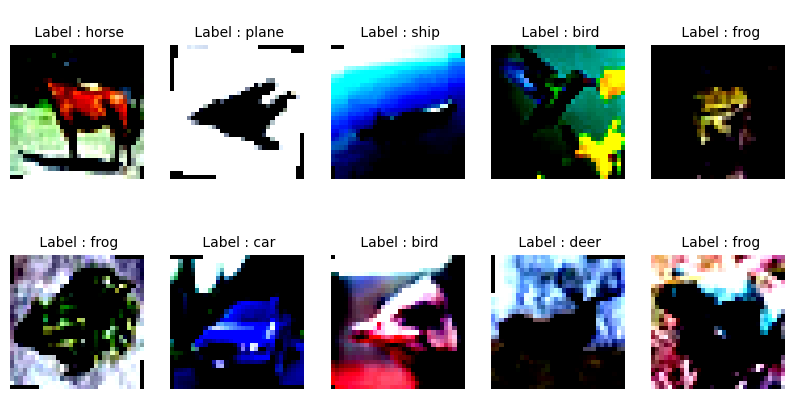

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

show_images(train_loader)

# Model Params


In [12]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
      BatchNorm2d-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1

# Training and Testing


In [13]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

# Train and Test of our model

In [14]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1 )
    train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    test(model, device, test_loader,test_losses, test_acc)

EPOCH: 1


Loss=1.3285261392593384 Batch_id=390 Accuracy=40.31: 100%|██████████| 391/391 [00:52<00:00,  7.48it/s]



Test set: Average loss: 1.3483, Accuracy: 5066/10000 (50.66%)

EPOCH: 2


Loss=1.063164472579956 Batch_id=390 Accuracy=55.65: 100%|██████████| 391/391 [00:42<00:00,  9.16it/s] 



Test set: Average loss: 1.1560, Accuracy: 5899/10000 (58.99%)

EPOCH: 3


Loss=0.875504195690155 Batch_id=390 Accuracy=60.53: 100%|██████████| 391/391 [00:45<00:00,  8.50it/s] 



Test set: Average loss: 1.0751, Accuracy: 6099/10000 (60.99%)

EPOCH: 4


Loss=1.0062808990478516 Batch_id=390 Accuracy=63.72: 100%|██████████| 391/391 [00:44<00:00,  8.79it/s]



Test set: Average loss: 1.0241, Accuracy: 6363/10000 (63.63%)

EPOCH: 5


Loss=0.8224471211433411 Batch_id=390 Accuracy=65.76: 100%|██████████| 391/391 [00:45<00:00,  8.62it/s]



Test set: Average loss: 0.9413, Accuracy: 6672/10000 (66.72%)

EPOCH: 6


Loss=0.9526883363723755 Batch_id=390 Accuracy=67.21: 100%|██████████| 391/391 [00:46<00:00,  8.33it/s]



Test set: Average loss: 0.8852, Accuracy: 6863/10000 (68.63%)

EPOCH: 7


Loss=1.1575524806976318 Batch_id=390 Accuracy=68.36: 100%|██████████| 391/391 [00:43<00:00,  8.97it/s]



Test set: Average loss: 0.8832, Accuracy: 6843/10000 (68.43%)

EPOCH: 8


Loss=1.0466463565826416 Batch_id=390 Accuracy=69.46: 100%|██████████| 391/391 [00:44<00:00,  8.70it/s]



Test set: Average loss: 0.8425, Accuracy: 7061/10000 (70.61%)

EPOCH: 9


Loss=0.8182666897773743 Batch_id=390 Accuracy=70.64: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]



Test set: Average loss: 0.8020, Accuracy: 7180/10000 (71.80%)

EPOCH: 10


Loss=0.8824098706245422 Batch_id=390 Accuracy=71.62: 100%|██████████| 391/391 [00:46<00:00,  8.37it/s]



Test set: Average loss: 0.7713, Accuracy: 7324/10000 (73.24%)

EPOCH: 11


Loss=0.7219885587692261 Batch_id=390 Accuracy=72.20: 100%|██████████| 391/391 [00:47<00:00,  8.23it/s]



Test set: Average loss: 0.7616, Accuracy: 7315/10000 (73.15%)

EPOCH: 12


Loss=0.7310726046562195 Batch_id=390 Accuracy=73.27: 100%|██████████| 391/391 [00:49<00:00,  7.94it/s]



Test set: Average loss: 0.7579, Accuracy: 7358/10000 (73.58%)

EPOCH: 13


Loss=0.650435209274292 Batch_id=390 Accuracy=73.57: 100%|██████████| 391/391 [00:50<00:00,  7.75it/s] 



Test set: Average loss: 0.7353, Accuracy: 7420/10000 (74.20%)

EPOCH: 14


Loss=0.5911235809326172 Batch_id=390 Accuracy=73.86: 100%|██████████| 391/391 [00:50<00:00,  7.70it/s]



Test set: Average loss: 0.6871, Accuracy: 7614/10000 (76.14%)

EPOCH: 15


Loss=1.00443696975708 Batch_id=390 Accuracy=74.49: 100%|██████████| 391/391 [00:59<00:00,  6.57it/s]  



Test set: Average loss: 0.6921, Accuracy: 7582/10000 (75.82%)

EPOCH: 16


Loss=0.67047518491745 Batch_id=390 Accuracy=74.90: 100%|██████████| 391/391 [00:59<00:00,  6.56it/s]  



Test set: Average loss: 0.6783, Accuracy: 7630/10000 (76.30%)

EPOCH: 17


Loss=0.5845380425453186 Batch_id=390 Accuracy=75.42: 100%|██████████| 391/391 [00:59<00:00,  6.57it/s]



Test set: Average loss: 0.6589, Accuracy: 7696/10000 (76.96%)

EPOCH: 18


Loss=0.815596878528595 Batch_id=390 Accuracy=75.72: 100%|██████████| 391/391 [01:00<00:00,  6.51it/s]  



Test set: Average loss: 0.6691, Accuracy: 7618/10000 (76.18%)

EPOCH: 19


Loss=0.706242024898529 Batch_id=390 Accuracy=75.88: 100%|██████████| 391/391 [00:59<00:00,  6.59it/s]  



Test set: Average loss: 0.6278, Accuracy: 7775/10000 (77.75%)

EPOCH: 20


Loss=0.6695348024368286 Batch_id=390 Accuracy=76.30: 100%|██████████| 391/391 [00:59<00:00,  6.58it/s] 



Test set: Average loss: 0.6408, Accuracy: 7782/10000 (77.82%)



In [15]:
train_losses1 = [t.cpu().item() for t in train_losses]

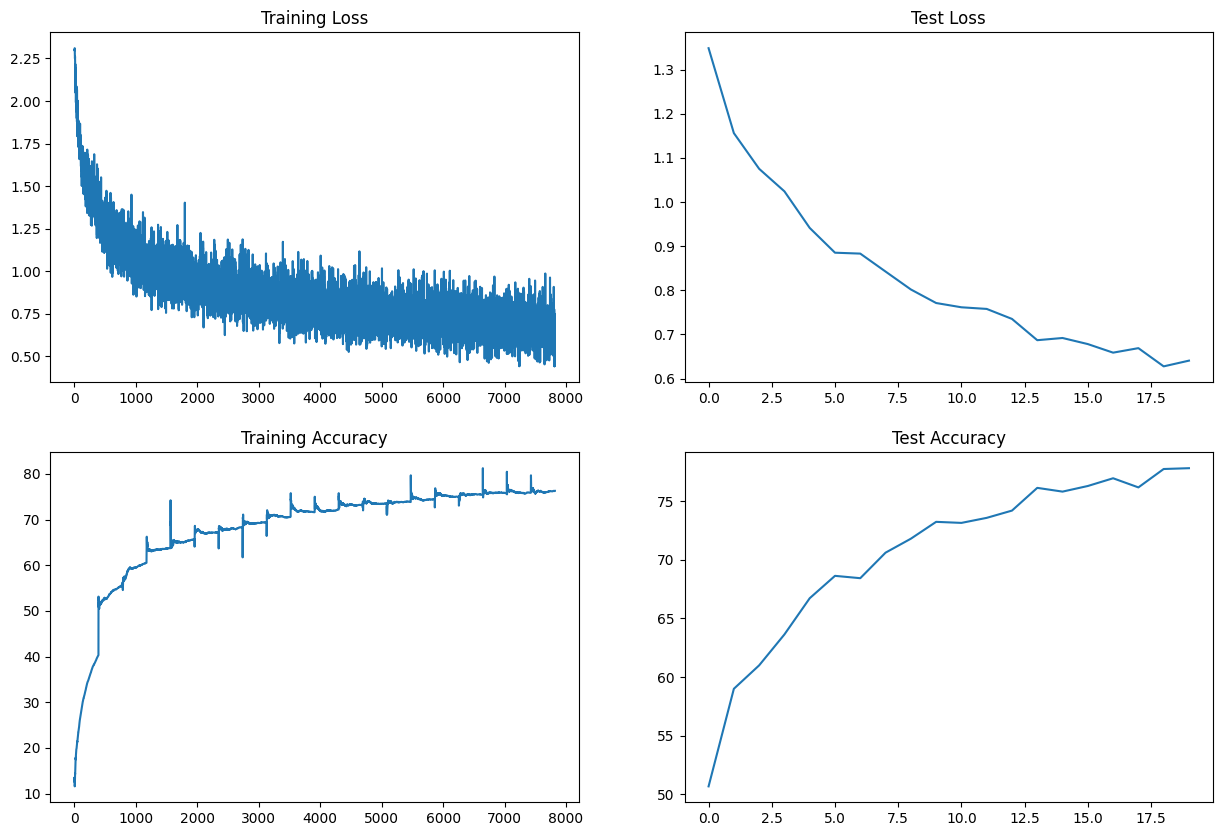

In [22]:
print_graph(train_losses1,train_acc, test_losses,test_acc)

In [17]:
wrong_prediction = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction.append((images[j], pred[j].item(), labels[j].item()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

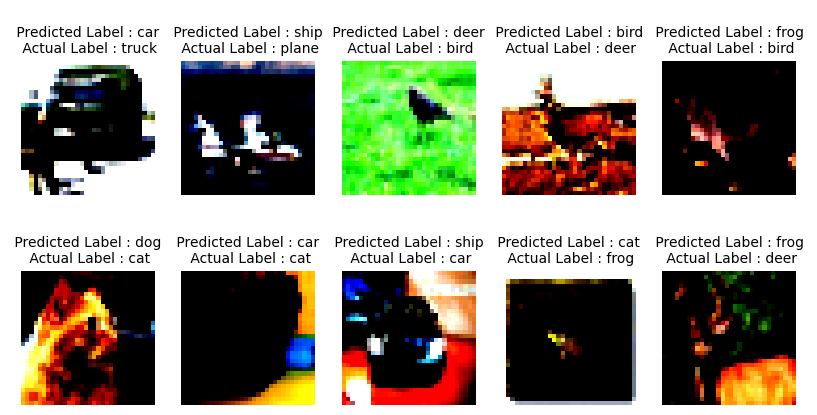

In [18]:
display_incorrect_images(wrong_prediction, n=10 )

# #